<a href="https://colab.research.google.com/github/KyoungmiKwon/trainingAtAiffel/blob/main/Regression_BikeSharingDemand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`BikeSharingDemand`

### import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

### load data

In [2]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aiffel/bike-sharing-demand/test.csv')
print(test.shape)
test.head(3)

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [3]:
bike = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aiffel/bike-sharing-demand/train.csv')
print(bike.shape)
bike.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


## EDA & Preprocessing

In [4]:
bike.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
df = bike.copy()
# 중복 검토
df.duplicated().sum()

np.int64(0)

In [6]:
# 결측치 검토
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [7]:
df = bike.copy()
# 문자열을 datetime 타입으로 변경.
df['datetime'] = df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
df['year'] = df.datetime.apply(lambda x : x.year)
df['month'] = df.datetime.apply(lambda x : x.month)
df['day'] = df.datetime.apply(lambda x : x.day)
df['hour'] = df.datetime.apply(lambda x: x.hour)
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [8]:
drop_columns = ['datetime','casual','registered']
df.drop(drop_columns, axis=1,inplace=True)

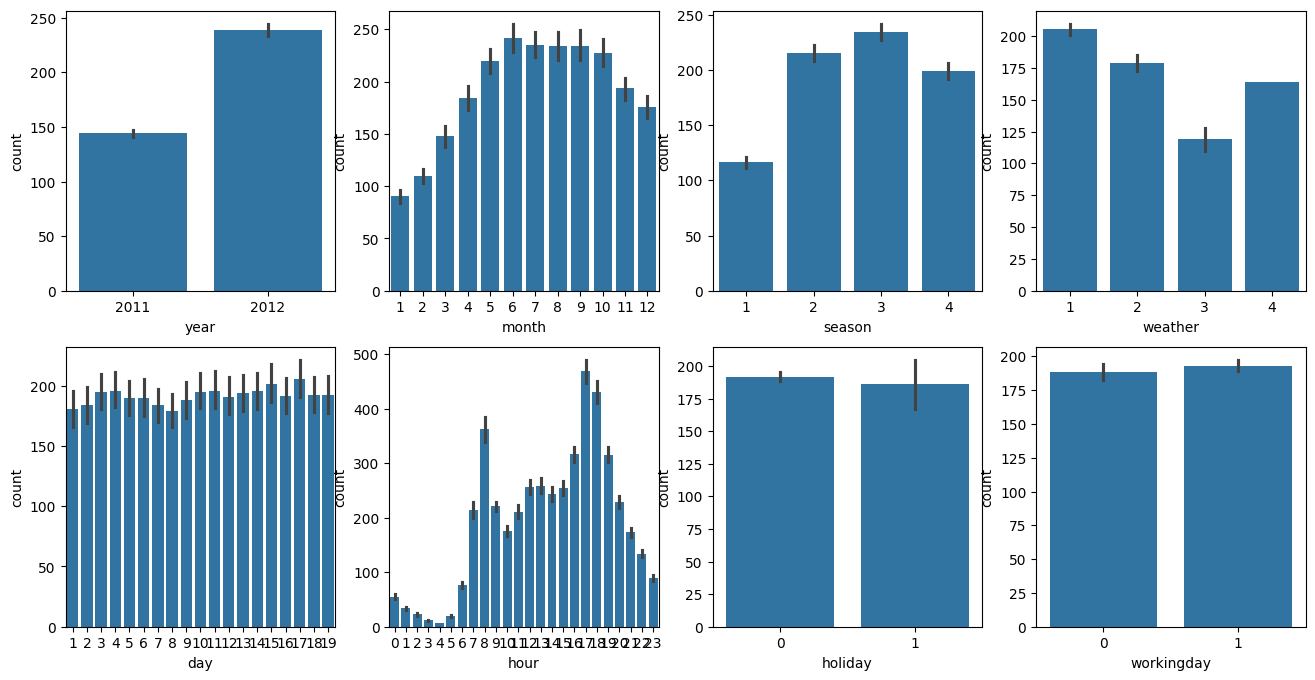

In [9]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
cat_features = ['year', 'month','season','weather','day', 'hour', 'holiday','workingday']
# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    # 시본의 barplot을 이용해 칼럼값에 따른 count의 합을 표현
    sns.barplot(x=feature, y='count', data=df, ax=axs[row][col])

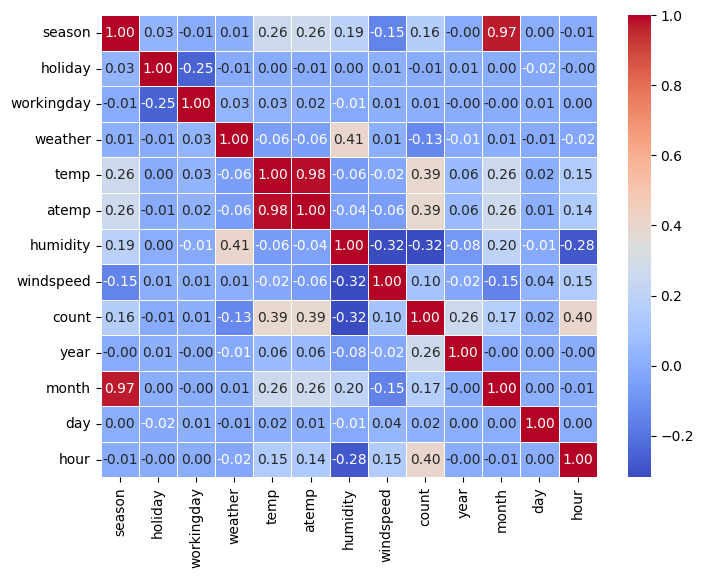

In [10]:
# 상관관계 행렬 계산
correlation_matrix = df.corr()

# 히트맵 그리기
plt.figure(figsize=(8, 6))  # 그림 크기 설정 (선택 사항)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

In [11]:
# 상관분석
corr_matrix = df.corr()
corr_matrix

def get_high_correlation_pairs(df, threshold=0.8):
    """
    DataFrame의 컬럼 간 상관계수가 지정된 임계값 이상인 쌍과 해당 상관계수를 반환합니다.

    Args:
        df (pd.DataFrame): 상관계수를 분석할 DataFrame.
        threshold (float): 상관계수의 임계값 (기본값: 0.8).

    Returns:
        pd.DataFrame: 상관계수가 임계값 이상인 컬럼 쌍과 해당 상관계수를 담은 DataFrame.
    """
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    high_corr = upper.stack()
    high_corr_filtered = high_corr[high_corr >= threshold].sort_values(ascending=False)
    high_corr_df = pd.DataFrame(high_corr_filtered, columns=['correlation'])
    return high_corr_df


get_high_correlation_pairs(df, threshold=0.8)


,,correlation
temp,atemp,0.984948
season,month,0.971524


In [12]:
""" 상관계수가 0.8 이상인 피처 PCA로 Enginerring => for 다중공선성문제 """

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_1 = df.copy()

cols = ['atemp', 'temp']
# 데이터 스케일링 (PCA 적용 전 필수)
scaler = StandardScaler()
scaled_temp = scaler.fit_transform(df_1[cols])

# PCA 적용 (2개의 컴포넌트 추출)
pca = PCA(n_components=1)
principal_components = pca.fit_transform(scaled_temp)

# 새로운 피처를 DataFrame에 추가
new_feature = principal_components
df_1.insert(0, column='temp_pca', value=new_feature)


# 기존 feature 지우기
df_1.drop(cols, axis=1,inplace=True)

df_1.head()


,temp_pca,season,holiday,workingday,weather,humidity,windspeed,count,year,month,day,hour
0,-1.715722,1,0,0,1,81,0.0,16,2011,1,1,0
1,-1.853559,1,0,0,1,80,0.0,40,2011,1,1,1
2,-1.853559,1,0,0,1,80,0.0,32,2011,1,1,2
3,-1.715722,1,0,0,1,75,0.0,13,2011,1,1,3
4,-1.715722,1,0,0,1,75,0.0,1,2011,1,1,4


<Axes: xlabel='humidity', ylabel='count'>

<Figure size 400x300 with 0 Axes>

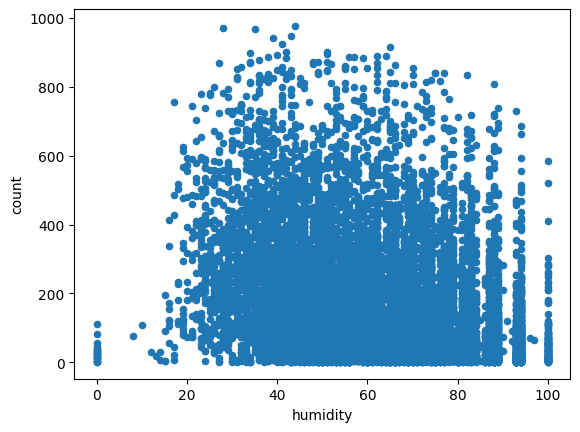

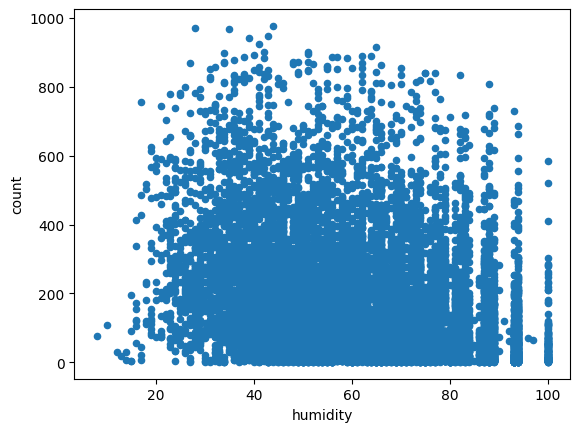

In [13]:
# Humidity
plt.figure(figsize=(4, 3))
df_1.plot.scatter(x='humidity',y='count')
df_1.drop(df_1[df_1['humidity'] <= 2].index, inplace=True) # 이상치 삭제
df_1.plot.scatter(x='humidity',y='count')

<Axes: xlabel='windspeed', ylabel='count'>

<Figure size 300x200 with 0 Axes>

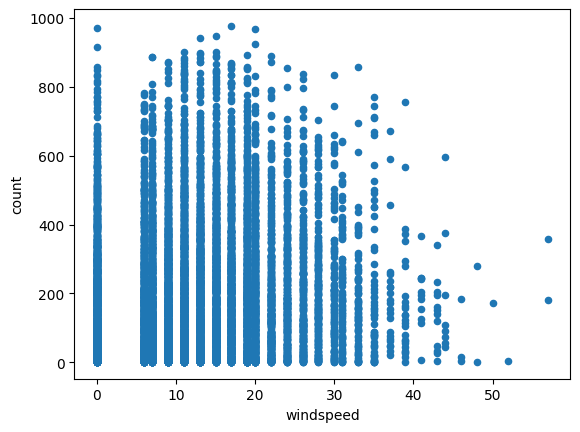

In [14]:
# windspeed
plt.figure(figsize=(3, 2))
df_1.plot.scatter(x='windspeed',y='count')

In [15]:
df_1[df_1["windspeed"] > 50]

,temp_pca,season,holiday,workingday,weather,humidity,windspeed,count,year,month,day,hour
760,-1.682292,1,0,1,1,42,51.9987,5,2011,2,15,1
868,-0.339442,1,0,0,1,16,50.0021,171,2011,2,19,15
2755,2.264276,3,0,0,3,49,56.9969,358,2011,7,3,17
2756,2.264276,3,0,0,3,49,56.9969,181,2011,7,3,18


In [16]:
df_1.drop(df_1[df_1["windspeed"] > 50].index, inplace=True) # 이상치 삭제

<Axes: xlabel='windspeed', ylabel='count'>

<Figure size 300x200 with 0 Axes>

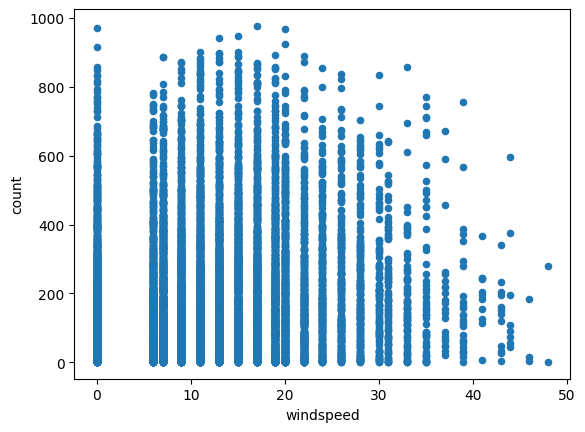

In [17]:
plt.figure(figsize=(3, 2))
df_1.plot.scatter(x='windspeed',y='count')

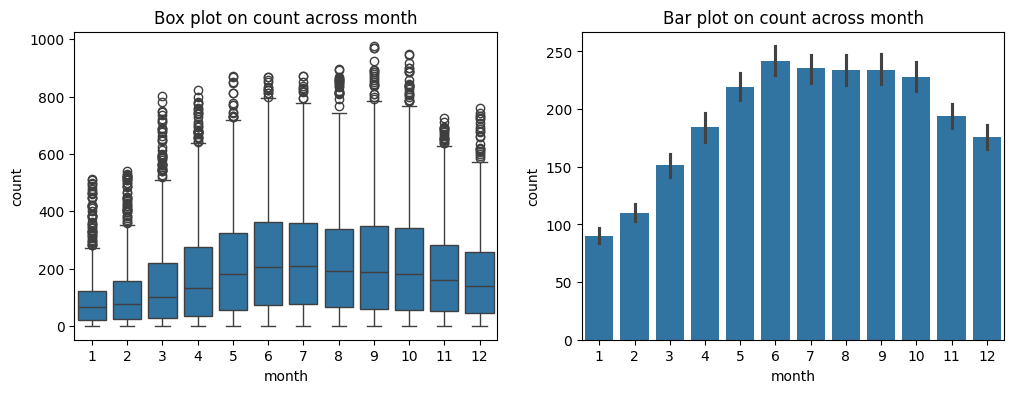

In [18]:
# DateTime
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
ax[0].set_title("Box plot on count across month")
sns.boxplot(x="month", y="count", data=df_1, ax=ax[0])
ax[1].set_title("Bar plot on count across month")
sns.barplot(x="month", y="count", data=df_1, ax=ax[1]);

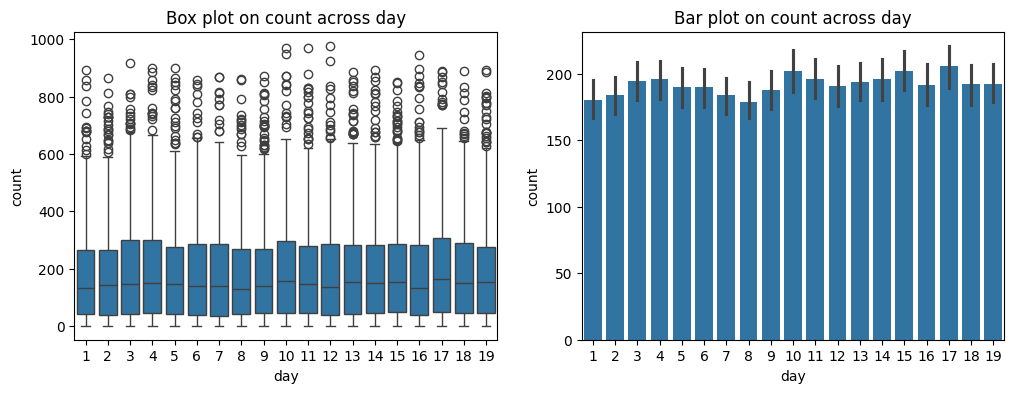

In [19]:
ig, ax = plt.subplots(ncols=2, figsize=(12, 4))
ax[0].set_title("Box plot on count across day")
sns.boxplot(x="day", y="count", data=df_1, ax=ax[0])
ax[1].set_title("Bar plot on count across day")
sns.barplot(x="day", y="count", data=df_1, ax=ax[1]);

<Axes: title={'center': 'count across hour -off'}, xlabel='hour', ylabel='count'>

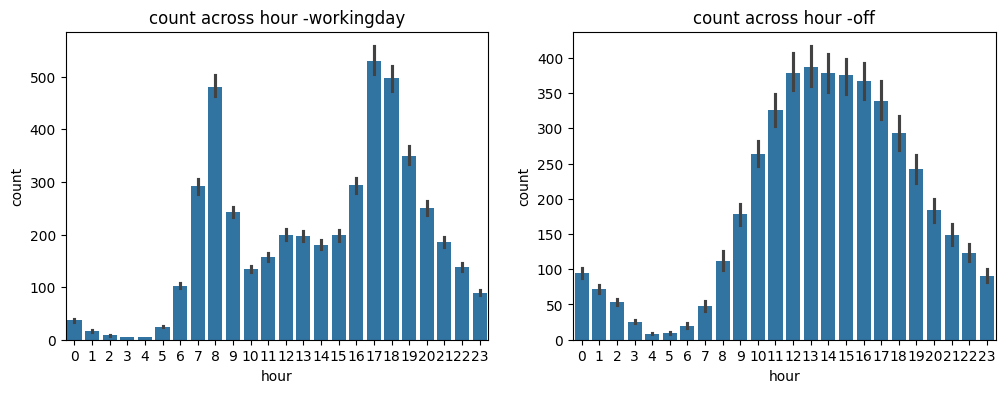

In [20]:
a = df_1[df_1['workingday'] == 1]
b = df_1[df_1['workingday'] == 0]
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
ax[0].set_title("count across hour -workingday")
sns.barplot(x="hour", y="count", data=a, ax=ax[0])
ax[1].set_title("count across hour -off")
sns.barplot(x="hour", y="count", data=b, ax=ax[1])

In [21]:
# New_featureEngineering

df_1['peak'] = df_1[['hour', 'workingday']].apply(
    lambda x: int((x['workingday'] == 1 and (x['hour'] == 8 or 17 <= x['hour'] <= 18)) or (x['workingday'] == 0 and 10 <= x['hour'] <= 19)),
    axis=1
)
df_1.head()

,temp_pca,season,holiday,workingday,weather,humidity,windspeed,count,year,month,day,hour,peak
0,-1.715722,1,0,0,1,81,0.0,16,2011,1,1,0,0
1,-1.853559,1,0,0,1,80,0.0,40,2011,1,1,1,0
2,-1.853559,1,0,0,1,80,0.0,32,2011,1,1,2,0
3,-1.715722,1,0,0,1,75,0.0,13,2011,1,1,3,0
4,-1.715722,1,0,0,1,75,0.0,1,2011,1,1,4,0


In [22]:
# 범주형 피처 원핫 인코딩
# 'holiday'와 'workingday'는 0과1로만 이루어져 있어서 원핫인코딩 제외시킴
df_1['day'] = pd.Categorical(df_1['day'], categories=range(1, 32))
cols = ['season','weather','year','month','day','hour']
df_1 = pd.get_dummies(df_1, columns=cols)
df_1.head(3)

,temp_pca,holiday,workingday,humidity,windspeed,count,peak,season_1,season_2,season_3,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,-1.715722,0,0,81,0.0,16,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-1.853559,0,0,80,0.0,40,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-1.853559,0,0,80,0.0,32,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
df_1.columns

Index(['temp_pca', 'holiday', 'workingday', 'humidity', 'windspeed', 'count',
       'peak', 'season_1', 'season_2', 'season_3', 'season_4', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'year_2011', 'year_2012',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8',
       'day_9', 'day_10', 'day_11', 'day_12', 'day_13', 'day_14', 'day_15',
       'day_16', 'day_17', 'day_18', 'day_19', 'day_20', 'day_21', 'day_22',
       'day_23', 'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_29',
       'day_30', 'day_31', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='

<Axes: >

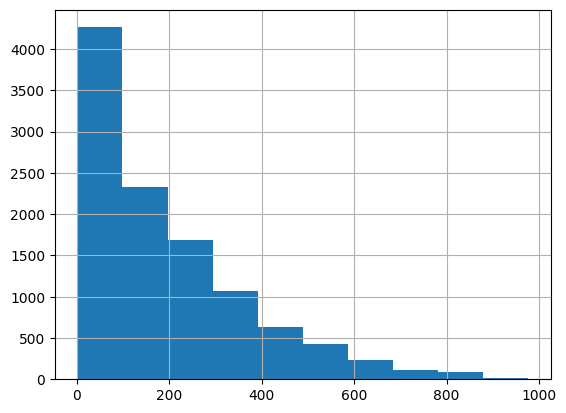

In [25]:
# target 형태 확인

# target과 fearue 분리
y_target = df_1['count']
X_features = df_1.drop(['count'],axis=1,inplace=False)

y_target.hist()

<Axes: >

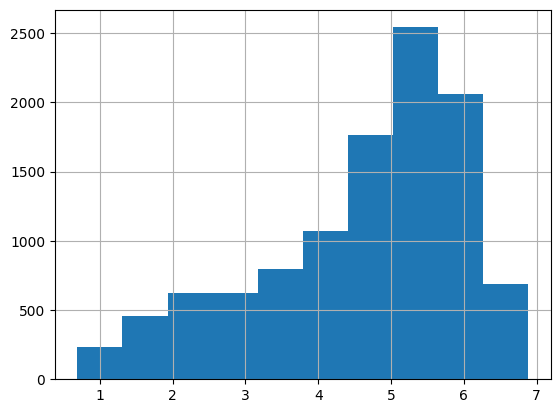

In [26]:
"""right skew 된 target 정규분포화 - 방법1. log scaling
*주의* 제출시(평가시) log scaling한 target 값을 다시 원래 scale값으로 변환해줘야 함 : expm1()함수 적용
"""
y_target_log = np.log1p(y_target)
y_target_log.hist()

In [27]:
X_features.head(3), y_target_log.head(3)

(   temp_pca  holiday  workingday  humidity  windspeed  peak  season_1  \
 0 -1.715722        0           0        81        0.0     0      True   
 1 -1.853559        0           0        80        0.0     0      True   
 2 -1.853559        0           0        80        0.0     0      True   
 
    season_2  season_3  season_4  ...  hour_14  hour_15  hour_16  hour_17  \
 0     False     False     False  ...    False    False    False    False   
 1     False     False     False  ...    False    False    False    False   
 2     False     False     False  ...    False    False    False    False   
 
    hour_18  hour_19  hour_20  hour_21  hour_22  hour_23  
 0    False    False    False    False    False    False  
 1    False    False    False    False    False    False  
 2    False    False    False    False    False    False  
 
 [3 rows x 83 columns],
 0    2.833213
 1    3.713572
 2    3.496508
 Name: count, dtype: float64)

## 기타 함수 설정 - 평가, 에러확인

In [28]:
""" 평가함수 만들기 """

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산
def evaluate_regr(y,pred):
    """
    y는 실제값, target 값
    pred는 예측값
    """
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    r2_score_val = r2_score(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}, R2:{3:.2f}'.format(rmsle_val, rmse_val, mae_val, r2_score_val))

In [29]:
""" 높은 오류 확인 하는 함수 만들기 """

def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성.
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력.
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

## 데이터셋 나누기

In [30]:
from sklearn.model_selection import train_test_split , GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7602, 83), (3258, 83), (7602,), (3258,))

## 모델선택-학습-평가-파라미터튜닝

| 모델   | RMSLE | RMSE    | MAE     | R2   | 비고      | 비고   | 비고   |
|------|-------|---------|---------|------|-----------|-------------|-------------|
| lr   | 0.59  | 97.79   | 63.42   | 0.71 | default   |      |      |
| Ridge | 0.59  | 98.544  | 63.897  | 0.7  | a = 10    |      |      |
| Lasso | 0.589 | 98.256  | 63.437  | 0.7  | a = 0.001 |      |      |




In [32]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test,pred)
# end of function get_model_predict

In [33]:
# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.001)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 0.559, RMSE: 82.081, MAE: 51.485, R2:0.80
### Ridge ###
RMSLE: 0.558, RMSE: 83.251, MAE: 51.973, R2:0.79
### Lasso ###
RMSLE: 0.558, RMSE: 83.454, MAE: 52.091, R2:0.79


<Axes: ylabel='None'>

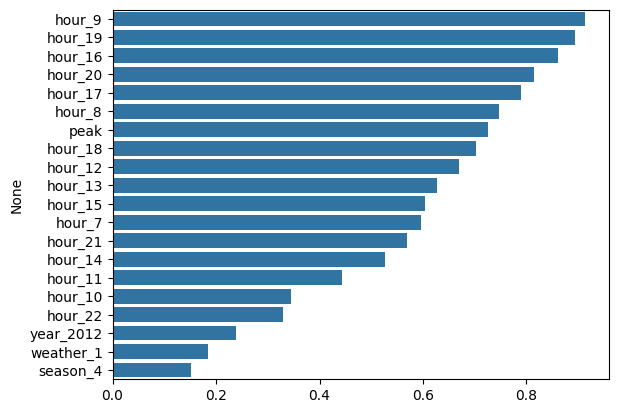

In [32]:
coef = pd.Series(lr_reg.coef_ , index=X_train.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

## 하이퍼파라미터 튜닝

| 모델   | 결과                                    | 비고                                  |
|------|-----------------------------------------|---------------------------------------|
| lr   | RMSLE: 0.590, RMSE: 97.790, MAE: 63.420, R2:0.71 | defalut                               |
| Ridge | RMSLE: 0.590, RMSE: 98.544, MAE: 63.897, R2:0.70 | a = 10                                |
| Lasso | RMSLE: 0.589, RMSE: 98.256, MAE: 63.437, R2:0.70 | a= 0.001                              |
| Ridge | RMSLE: 0.590, RMSE: 98.297, MAE: 63.750, R2:0.70 | {'alpha': 7.428270819562184, 'fit_intercept': 1, 'positive': 0, 'tol': 0.0002512885780193979} |
|  |  | 규제를 주어 비교 해 보았을 때, 일반 선형회귀가 성능이 좋을 것을 보니, 규제를 주어서 조절할 상황이 아닌 것으로 판단됨|
|RF  |RMSLE: 0.357, RMSE: 50.679, MAE: 31.204, R2:0.92  |default, n_estimator =500 |
|GB  |RMSLE: 0.344, RMSE: 56.184, MAE: 34.637, R2:0.90  |default, n_estimator =500  |
|XGB |RMSLE: 0.340, RMSE: 52.307, MAE: 31.427, R2:0.92  |default, n_estimator =500  |
|LGBM  |RMSLE: 0.318, RMSE: 46.827, MAE: 28.999, R2:0.93  |default, n_estimator =500  |
|  |  | |
|  |  | |
|  |  | |

### Ridge

In [130]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Ridge_model = Pipeline([
    ('scaler', StandardScaler()),
    ('Ridge', Ridge(alpha=110))
])

Ridge_model.fit(X_train, y_train)
pred = Ridge_model.predict(X_test)
evaluate_regr(y_test, pred)

RMSLE: 0.140, RMSE: 0.558, MAE: 0.403, R2:0.85


In [33]:
from hyperopt import fmin, tpe, hp, Trials
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold

# Ridge
param = {
    'alpha': hp.loguniform('alpha', -1, 2), # 기본값 1.0 (log10(1.0) = 0)을 포함하는 범위 (10^-1 ~ 10^2)
    'fit_intercept': hp.choice('fit_intercept', [True, False]), # 기본값 True
    'positive': hp.choice('positive', [True, False]), # 기본값 False
    'tol': hp.loguniform('tol', -4, -2) # 기본값 1e-3 (log10(1e-3) = -3)을 포함하는 범위 (10^-4 ~ 10^-2)
}

def objective_func(params):ß
    ridge_model = Ridge(alpha=params['alpha'],
                        fit_intercept=params['fit_intercept'],
                        tol=params['tol'],
                        positive=params['positive'],
                        random_state=42) # 재현성을 위해 random_state 고정

    # 교차 검증을 사용하여 모델 성능 평가 (RMSE의 음수 값)
    scores = cross_val_score(ridge_model, X_train, y_train, cv=5,
                             scoring='neg_root_mean_squared_error')
    return np.mean(scores) # Hyperopt는 최소화를 목표로 하므로 음수 RMSE 반환


# 3. HyperOpt의 fmin()으로 최적 하이퍼 파라미터 탐색

trials = Trials()
best = fmin(fn=objective_func, # 목적 함수
             space=param, # 하이퍼 파라미터 검색 공간
             algo=tpe.suggest, # TPE 알고리즘을 사용하여 하이퍼 파라미터 조합을 생성
             max_evals=100, ## max_evals는 100으로 설정하여 100번의 하이퍼 파라미터 조합을 평가.
             trials=trials, ## trials는 HyperOpt의 평가 이력 저장을 위한 객체로
             # rstate=np.random.default_rng(seed=30) # seed 고정
            )
print('best hyper-parameter: ', best)

# 4. 학습
opt_model = Ridge(alpha=best['alpha'],
                 fit_intercept=bool(best['fit_intercept']),
                 tol=best['tol'],
                 positive=bool(best['positive'])
                 )
get_model_predict(opt_model,X_train, X_test, y_train, y_test,is_expm1=True)


100%|██████████| 100/100 [00:10<00:00,  9.46trial/s, best loss: -2.1721000815868736]
best hyper-parameter:  {'alpha': np.float64(7.3836320943813), 'fit_intercept': np.int64(1), 'positive': np.int64(0), 'tol': np.float64(0.05304177723592817)}
### Ridge ###
RMSLE: 0.539, RMSE: 78.618, MAE: 50.060, R2:0.81


### Lasso

In [120]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

lasso_model = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=0.001))
])

lasso_model.fit(X_train, y_train)
pred = lasso_model.predict(X_test)
evaluate_regr(y_test, pred)

RMSLE: 0.140, RMSE: 0.558, MAE: 0.402, R2:0.85


In [34]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from hyperopt import fmin, hp, tpe, Trials

# Lasso 하이퍼파라미터 탐색 공간 정의
param = {
    'alpha': hp.loguniform('alpha', -4, 100),  # L1 규제 강도 (로그 스케일, 10^-4 ~ 10^2 범위 탐색)
    'fit_intercept': hp.choice('fit_intercept', [True, False]),  # 절편 포함 여부
    'positive': hp.choice('positive', [True, False]),  # 양수 계수 제약 여부
    'tol': hp.loguniform('tol', -5, -2),  # 수렴 허용 오차 (로그 스케일, 10^-5 ~ 10^-2 범위 탐색)
    'selection': hp.choice('selection', ['cyclic', 'random'])  # 계수 업데이트 방식
}

# 목적 함수 정의
def lasso_objective_func(params):
    lasso_model = Lasso(alpha=params['alpha'],
                        fit_intercept=params['fit_intercept'],
                        positive=params['positive'],
                        tol=params['tol'],
                        selection=params['selection'],
                        random_state=42)  # 재현성을 위해 random_state 고정

    # 교차 검증을 사용하여 모델 성능 평가 (RMSE의 음수 값)
    scores = cross_val_score(lasso_model, X_train, y_train, cv=5,
                             scoring='neg_root_mean_squared_error')
    return np.mean(scores)  # Hyperopt는 최소화를 목표로 하므로 음수 RMSE 반환

# HyperOpt의 fmin()으로 최적 하이퍼 파라미터 탐색
trials = Trials()
lasso_best = fmin(fn=lasso_objective_func,  # 목적 함수
                  space=param,  # 하이퍼 파라미터 검색 공간
                  algo=tpe.suggest,  # TPE 알고리즘을 사용하여 하이퍼 파라미터 조합을 생성
                  max_evals=100,  # max_evals는 100으로 설정하여 100번의 하이퍼 파라미터 조합을 평가
                  trials=trials,  # trials는 HyperOpt의 평가 이력 저장을 위한 객체
                  )
print('best hyper-parameter (Lasso): ', lasso_best)

# 학습 (최적 파라미터로 모델 학습 및 예측)
opt_lasso_model = Lasso(alpha=lasso_best['alpha'],
                       fit_intercept=bool(lasso_best['fit_intercept']),
                       positive=bool(lasso_best['positive']),
                       tol=lasso_best['tol'],
                       selection=['cyclic', 'random'][lasso_best['selection']] # 문자열로 변환
                       )
# 모델 성능평가
get_model_predict(opt_lasso_model, X_train, X_test, y_train, y_test, is_expm1=True)

100%|██████████| 100/100 [00:17<00:00,  5.75trial/s, best loss: -4.8101361905039]
best hyper-parameter (Lasso):  {'alpha': np.float64(4.84808780581088e+18), 'fit_intercept': np.int64(1), 'positive': np.int64(0), 'selection': np.int64(0), 'tol': np.float64(0.022939216597300856)}
### Lasso ###
RMSLE: 1.423, RMSE: 203.429, MAE: 142.328, R2:-0.27


### 회귀트리

In [35]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500, verbose = -1)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True)


### RandomForestRegressor ###
RMSLE: 0.325, RMSE: 43.618, MAE: 26.928, R2:0.94
### GradientBoostingRegressor ###
RMSLE: 0.312, RMSE: 45.903, MAE: 28.622, R2:0.94
### XGBRegressor ###
RMSLE: 0.328, RMSE: 46.116, MAE: 28.231, R2:0.93


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### LGBMRegressor ###
RMSLE: 0.303, RMSE: 42.052, MAE: 26.067, R2:0.95


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [36]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

lgbm_clf = LGBMRegressor(n_estimators=500,
                          num_leaves=32,
                          n_jobs=-1,
                          early_stop_round = 10,
                          metric='auc',
                          boost_from_average=False,
                          verbose=-1
                         )

xgb_clf = XGBRegressor(n_estimators=500,
                        learning_rate=0.05,
                        early_stopping_rounds=10,
                        eval_metric='auc',
                        verbose=False
                       )

### Random Forest - Bagging ; 파라미터튜닝하는 것이 더 결과가 나쁨

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from hyperopt import hp, fmin, tpe, Trials
from sklearn.metrics import make_scorer

# RMSLE 계산 함수
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# RMSLE를 Scikit-learn 평가 지표로 만들기
rmsle_scorer = make_scorer(rmsle)

# 하이퍼파라미터 검색 공간 설정 (RandomForestRegressor에 맞게 조정)
rf_params = {
    'n_estimators': hp.randint('n_estimators', 100, 1000),  # 생성할 트리 개수 (기본값: 100, 탐색 범위: 100부터 999까지의 정수)
    'max_depth': hp.choice('max_depth', [1,2,3,4,5, 10, 15]),  # 트리의 최대 깊이 (기본값: None, 탐색 옵션: None(무제한), 5, 10, 15 중 하나 선택)
    'min_samples_split': hp.randint('min_samples_split', 2, 10),  # 노드를 분할하기 위한 최소 샘플 수 (기본값: 2, 탐색 범위: 2부터 9까지의 정수)
    'min_samples_leaf': hp.randint('min_samples_leaf', 1, 5),  # 리프 노드에 있어야 하는 최소 샘플 수 (기본값: 1, 탐색 범위: 1부터 4까지의 정수)
    'max_features': hp.uniform('max_features', 0.6, 1.0),  # 각 트리에서 사용할 피처의 비율 (기본값: 'sqrt' 또는 'auto', 탐색 범위: 0.6부터 1.0 사이의 실수)
}

# 목적 함수 설정 (RandomForestRegressor 사용)
def objective_func(search_space):
    model = RandomForestRegressor(**search_space,
                                  n_jobs=-1
                                 )

    cv = KFold(n_splits=5, shuffle=True)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=rmsle_scorer, error_score='raise')
    return np.mean(scores)


# fmin() 호출
trials = Trials()
best = fmin(
          fn=objective_func,
          space=rf_params,
          algo=tpe.suggest,
          max_evals=10,
          trials=trials
)

print('Best Random Forest parameters:', best)

# 최적 점수 확인
best_rf_score = min([trial['result']['loss'] for trial in trials.trials])
print("Best Random Forest RMSLE score:", best_rf_score)

100%|██████████| 10/10 [04:24<00:00, 26.41s/trial, best loss: 0.09332554462019019]
Best Random Forest parameters: {'max_depth': np.int64(6), 'max_features': np.float64(0.9707140641058727), 'min_samples_leaf': np.int64(2), 'min_samples_split': np.int64(9), 'n_estimators': np.int64(479)}
Best Random Forest RMSLE score: 0.09332554462019019


In [38]:
# 최적 하이퍼파라미터로 Random Forest 모델 학습
rf_model = RandomForestRegressor(**best,
                                 n_jobs=-1,
                                 #random_state=42
                                 )
rf_model.fit(X_train, y_train)

# 모델 평가
pred = rf_model.predict(X_test)
evaluate_regr(y_test, pred)

RMSLE: 0.153, RMSE: 0.716, MAE: 0.523, R2:0.75


In [44]:
params = {'n_estimators': 1000, 'max_depth': 15, 'min_samples_split' : 5}

rf_model = RandomForestRegressor(**params,
                                 n_jobs=-1,
                                 #random_state=42
                                 )
rf_model.fit(X_train, y_train)

# 모델 평가
pred = rf_model.predict(X_test)
evaluate_regr(y_test, pred)

RMSLE: 0.089, RMSE: 0.357, MAE: 0.257, R2:0.94


In [46]:
get_top_error_data(y_test,pred,n_tops=5) ;np.expm1(2.613706)

      real_count  predicted_count      diff
1199    1.386294              4.0  2.613706
2012    4.897840              3.0  1.897840
2628    3.806662              2.0  1.806662
1365    2.197225              4.0  1.802775
2177    3.218876              5.0  1.781124


np.float64(12.649542437406442)

### LightGBM

In [116]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from lightgbm import LGBMRegressor, early_stopping
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# RMSLE 계산 함수
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 하이퍼파라미터 검색 공간 설정
params = {
    'num_leaves': hp.randint('num_leaves', 20, 150),
    'max_depth': hp.choice('max_depth', [-1, 5, 10, 15]),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.0067), np.log(0.37)),
    'min_child_weight': hp.loguniform('min_child_weight', np.log(0.002), np.log(20)),
    'min_child_samples': hp.randint('min_child_samples', 10, 100),
    'subsample': hp.uniform('subsample', 0.7, 1.0),
    'subsample_freq': hp.choice('subsample_freq', [0, 1]),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
}

# 목적 함수 설정
def objective_func(search_space):
    model = LGBMRegressor(
        n_estimators=1000,  # 충분히 큰 n_estimators 설정
        **search_space,
        n_jobs=-1,
        importance_type='split',
        boost_from_average=False,
        verbose=-1
    )

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = []

    for train_index, val_index in cv.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(
            X_train_fold, y_train_fold,
            eval_set=[(X_val_fold, y_val_fold)],
            eval_metric='rmsle',  # LightGBM의 기본 평가 지표 사용
            callbacks=[early_stopping(stopping_rounds=150)],  # early stopping 설정

        )

        y_pred_val = model.predict(X_val_fold)
        rmsle_val = rmsle(y_val_fold, y_pred_val)
        scores.append(rmsle_val)

    return np.mean(scores)

# fmin() 호출
trials = Trials()
best = fmin(
    fn=objective_func,
    space=params,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials
)

print('Best parameters:', best)

# 최적 점수 확인
best_score = min([trial['result']['loss'] for trial in trials.trials])
print("Best RMSLE score:", best_score)

Training until validation scores don't improve for 150 rounds
Did not meet early stopping. Best iteration is:
[996]	valid_0's l2: 0.102998
Training until validation scores don't improve for 150 rounds
Early stopping, best iteration is:
[806]	valid_0's l2: 0.0993421
Training until validation scores don't improve for 150 rounds
Did not meet early stopping. Best iteration is:
[940]	valid_0's l2: 0.0923259
Training until validation scores don't improve for 150 rounds
Early stopping, best iteration is:
[770]	valid_0's l2: 0.0939762
Training until validation scores don't improve for 150 rounds
Did not meet early stopping. Best iteration is:
[998]	valid_0's l2: 0.109222
Training until validation scores don't improve for 150 rounds
Early stopping, best iteration is:
[766]	valid_0's l2: 0.0957308
Training until validation scores don't improve for 150 rounds
Early stopping, best iteration is:
[603]	valid_0's l2: 0.101788
Training until validation scores don't improve for 150 rounds
Did not meet 

In [48]:
LGBM_model = LGBMRegressor(**best,
                          n_estimators=1000,
                          verbose=-1,
                          #objective='rmse'
                          )

evals = [(X_train, y_train), (X_test, y_test)]

LGBM_model.fit(
    X_train, y_train,
    eval_set=evals,  # 평가 데이터셋 설정
    eval_metric='rmsle',  # 평가 지표 설정
    callbacks=[early_stopping(stopping_rounds=50)],  # early stopping 설정
)

Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's l2: 0.129389	valid_1's l2: 0.126947


LGBMRegressor(colsample_bytree=np.float64(0.7574584807552293),
              learning_rate=np.float64(0.034451648821656494),
              max_depth=np.int64(2), min_child_samples=np.int64(53),
              min_child_weight=np.float64(0.0023055866976667986),
              n_estimators=1000, num_leaves=np.int64(148),
              subsample=np.float64(0.8889310989624085),
              subsample_freq=np.int64(0), verbose=-1)

In [117]:
pred = LGBM_model.predict(X_test)
evaluate_regr(y_test, pred)

RMSLE: 0.096, RMSE: 0.366, MAE: 0.264, R2:0.93


예측결과 혼합을 통한 최종예측

| 모델 1 | 1_성능 | 모델 2 | 2_성능 | 평가                                      | 비고          |
|--------|--------|--------|--------|-------------------------------------------|---------------|
| LGBM   | 0.318  | XGB    | 0.34   | RMSLE: 0.086, RMSE: 0.315, MAE: 0.219, R2:0.95 | Score : 0.40894 |
| LGBM   | 0.086  | XGB    | 위와 동일 |RMSLE: 0.087, RMSE: 0.318, MAE: 0.221, R2:0.95| Score : 0.4794 |
| LGBM  |0.086   |  rf        | 0.160         |RMSLE: 0.106, RMSE: 0.431, MAE: 0.323, R2:0.91  |score : 0.45204              |
1      |        |        |        |                                           | 1             |



In [51]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 개별 모델의 학습 - 위에서 파라미터 튜닝하면서 얻은 모델 사용하기
# xgb_reg = XGBRegressor(n_estimators=500)
# lgbm_reg = LGBMRegressor(n_estimators=500)


# 개별 모델 훈련 및 예측
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)

# lgbm_reg.fit(X_train, y_train)
lgbm_pred = LGBM_model.predict(X_test)

# rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


# 개별 모델 예측값 혼합으로 최종 예측값 도출
final_pred = 0.0 * xgb_pred + 0.8 * lgbm_pred + 0.2 * rf_pred

# 최종 예측값 평가
evaluate_regr(y_test, final_pred)

RMSLE: 0.088, RMSE: 0.342, MAE: 0.246, R2:0.94


In [ ]:
# 스태킹


## Submission을 위하여

In [52]:
sample = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aiffel/bike-sharing-demand/sampleSubmission.csv')
print(sample.shape)
sample.head(3)

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0


### Train과 같은 전처리 하기

In [53]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aiffel/bike-sharing-demand/test.csv')
print(test.shape)
dft = test.copy()
dft.head(3)

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [54]:
# train과 같은 전처리를 진행해보자
dft['datetime'] = dft.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
dft['year'] = dft.datetime.apply(lambda x : x.year)
dft['month'] = dft.datetime.apply(lambda x : x.month)
dft['day'] = dft.datetime.apply(lambda x : x.day)
dft['hour'] = dft.datetime.apply(lambda x: x.hour)
dft.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2


In [55]:
# 이미 테스트 데이터셋에는 casual, registered 가 빠져있음
drop_columns = ['datetime']
dft.drop(drop_columns, axis=1,inplace=True)

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

dft1 = dft.copy()

cols = ['atemp', 'temp']
# 데이터 스케일링 (PCA 적용 전 필수)
scaler = StandardScaler()
scaled_temp = scaler.fit_transform(dft1[cols])

# PCA 적용 (2개의 컴포넌트 추출)
pca = PCA(n_components=1)
principal_components = pca.fit_transform(scaled_temp)

# 새로운 피처를 DataFrame에 추가
new_feature = principal_components
dft1.insert(0, column='temp_pca', value=new_feature)


# 기존 feature 지우기
dft1.drop(cols, axis=1,inplace=True)

dft1.head()


,temp_pca,season,holiday,workingday,weather,humidity,windspeed,year,month,day,hour
0,-1.892330,1,0,1,1,56,26.0027,2011,1,20,0
1,-1.709556,1,0,1,1,56,0.0000,2011,1,20,1
2,-1.709556,1,0,1,1,56,0.0000,2011,1,20,2
3,-1.770347,1,0,1,1,56,11.0014,2011,1,20,3
4,-1.770347,1,0,1,1,56,11.0014,2011,1,20,4


In [57]:
dft1['peak'] = dft1[['hour', 'workingday']].apply(
    lambda x: int((x['workingday'] == 1 and (x['hour'] == 8 or 17 <= x['hour'] <= 18)) or (x['workingday'] == 0 and 10 <= x['hour'] <= 19)),
    axis=1
)
dft1.head()

,temp_pca,season,holiday,workingday,weather,humidity,windspeed,year,month,day,hour,peak
0,-1.892330,1,0,1,1,56,26.0027,2011,1,20,0,0
1,-1.709556,1,0,1,1,56,0.0000,2011,1,20,1,0
2,-1.709556,1,0,1,1,56,0.0000,2011,1,20,2,0
3,-1.770347,1,0,1,1,56,11.0014,2011,1,20,3,0
4,-1.770347,1,0,1,1,56,11.0014,2011,1,20,4,0


In [58]:
# 범주형 피처 원핫 인코딩
# 'holiday'와 'workingday'는 0과1로만 이루어져 있어서 원핫인코딩 제외시킴
dft1['day'] = pd.Categorical(dft1['day'], categories=range(1, 32))
cols = ['season','weather','year','month','day','hour']
dft2 = pd.get_dummies(dft1, columns=cols)
dft2.head(3)

,temp_pca,holiday,workingday,humidity,windspeed,peak,season_1,season_2,season_3,season_4,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,-1.892330,0,1,56,26.0027,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-1.709556,0,1,56,0.0000,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-1.709556,0,1,56,0.0000,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [123]:
# 최종모델로 예측하기

# Lasso

lasso_pred = lasso_model.predict(dft2)

# 1. RandomForest
rf_pred = rf_model.predict(dft2)

# 2. LGBM
LGBM_pred = opt_model.predict(dft2)

# 3.  예츨결과 혼합
# # 개별 모델 예측
xgb_pred = xgb_reg.predict(dft2)
# lgbm_pred = lgbm_reg.predict(dft2)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
final_pred = lasso_pred + 0. * rf_pred + 0.0 * xgb_pred + 0. * LGBM_pred

final_pred[:5]
final_pred.max(), final_pred.min()

(np.float64(6.985384579839559), np.float64(0.545846409200454))

In [124]:
# 학습시 로그변환한 target을 썻으니 결과값을 다시 복원해야합니다
pred_exp = np.expm1(final_pred)
pred_exp[:5]

array([15.49749871,  8.68118461,  5.4755218 ,  2.59664409,  1.73685342])

In [125]:
pred_exp.max(), pred_exp.min()

(np.float64(1079.7219617010928), np.float64(0.726068724714871))

In [126]:
# sample 파일에 예측 값을 넣어주고
sample["count"] = pred_exp

In [127]:
# csv로 저장하기
sample.to_csv("./submission.csv", index=False)